# Cognitive Modelling Assignment 2  <font color='red'>Deadline = 25 april 23:59</font>

In totaal kan je voor deze opdracht __81 punten__ halen + 5 bonuspunten.

## Fitting functions

Hieronder volgen wat korte vragen en uitleg over model fitting ter voorbereiding op de verdere assignments. Een deel van de theorie komt misschien bekend voor. Het is de bedoeling dat je op basis van deze simpele opdracht inziet hoe het fitten van een cognitief model niet veel verschilt van het fitten van een wiskundige formule op data. In de basis is het idee dat je door een bepaalde methode de parameters van de desbetreffende functie kan vinden die de data, of het gedrag van mensen, zo goed mogelijk kan beschrijven. 

Wegens historische redenen is het eerste deel van deze opdracht nog in het Engels, je mag in het Nederlands of in het Engels antwoorden. 

Bij elke vraag staat de hoeveelheid punten die je er voor kan krijgen. Geef antwoorden in blokken met code of met tekst. Gebruik voor antwoorden met tekst de ">" voor blockquotes en geef bij elke vraag ook __kort uitleg__ als hierom wordt gevraagd. __Let op__: soms staan er meerdere vragen bij een onderdeel, lees de tekst dus nauwkeurig. 

Sla het uiteindelijke notebook __met al gerunde output__ op, met jullie studentnummers en achternamen in de filenaam: `studentnummer1_achternaam1_studentnummer2_achternaam2_opdrachtnummer`. 

In [46]:
from scipy import stats
import numpy as np
import random
import math

%matplotlib inline
import matplotlib.pyplot as plt

---

## 0. Fitting functions

Voor deze inleidende opdracht schrijven we verschillende functies en gaan deze op data "fitten". De meeste concepten hier moeten bekend zijn uit de cursus *Leren*, behalve dat we de *SciPy*-library zullen gebruiken om de functies te fitten op data. Met fitten bedoelen we de optimale waarden vinden van de parameters in de functie zodat deze de data het best mogelijk benadert. De *SciPy*-library komt goed van pas bij latere opdrachten, dus het is handig om hier alvast wat elementen te introduceren.

### Generating simulation data

Assume there is some model that is defined by the following function:

$$y = e^{\frac{3 x}{20}}$$

Imagine that this represents the relationship between the temperature (`x`) and the amount of ice cream sold (`y`) in a small ice cream store. The higher the temperature, the more ice cream is sold. For an ice cream shop owner it would be good to know this exact relationship, such that she can predict how much to have in store when the temperature is changing. 

Of course, such a relationship cannot be found in a book but must be estimated from data. So in the first step we will generate some data. Below, we:  

* Write a function `curve` which implements this model
* Generate 50 uniformly spaced x-values over the interval `[1, 13]` using [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
* Apply the curve function to the entire *ndarray* of x-values using [vectorize](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html)

The shop owner is taking note of the ice cream sold on every day but of course such measurements are noisy: not on each day that it is 10 degrees celcius will the exact same amount of people show up. Their ice cream buying behavior will be determined not only by the temperature but also many other factors (e.g. how much money the customers have in their account) that are unknown to the shop owner. Therefore we will add some noise to the data. Below, we:

* Create an *ndarray* of noise from a Gaussian distribution with $\mu = 0.0$ and $\sigma = 1.0$ using [random.normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html)
* Add the noise to the curve results to create the artificial simulation data
* Plot the actual underlying curve as a (curved) line and the simulated data as dots, both in the same plot

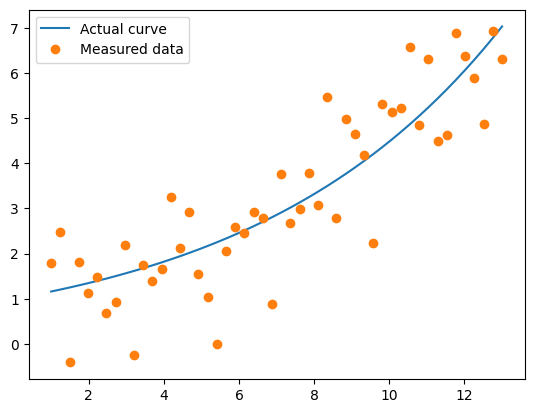

In [47]:
np.random.seed(seed=99999)

def curve(x):
    return math.e**(3*x/20)

samples = np.linspace(1, 13)
model_data = np.vectorize(curve)(samples)

noise = np.random.normal(size=samples.shape)
sim_data = model_data + noise

plt.plot(samples, model_data, label='Actual curve')
plt.plot(samples, sim_data, 'o', label='Measured data')
plt.legend()
plt.show()

---

### Q.0a Fitting a linear model (2 points)

Now we'll use *SciPy* to fit a line through this simulation data. In *Leren* we needed to compute the partial derivative of the error function with respect to each of the model parameters to know how to modify those parameters to get the derivates (close to) zero. Here, we will just define what the error function is, and let *SciPy* do the actual minimization work. Let's assume that we are looking at the relationship between the temperature and ice cream sales volume. We expect that the higher the temperature, the more ice cream will be sold. 

The first model will be a very basic linear one, with only 1 parameter `a`. This model assumes there is a linear relationship between variables x and y:

$$y = ax$$

*(note: this line will always pass through the origin, in other words the intercept is zero)*

* Write a function `linear` which implements this model

It is our goal to find the optimal value for `a`.

* Write a function `MSE` which computes the *Mean Squared Error* of an array of model estimates `y_hat` and an array of observed data `y`

Already provided is a general function called `MSE_fit_func` which takes 4 arguments:
1. *params:* A set of model parameters for the model function
2. *func:* The model function that is being applied
3. *x:* An array of x values
4. *y:* An array of y values

This function applies the model function to the *x* values using the model parameters and computes the resulting *MSE* with the observed *y* values. Assuming the data (i.e. the *x* and *y* values) and the model function are fixed, the model parameter(s) can be varied and the function will return an *MSE* for each parameter setting.

The *SciPy* module *optimize* has a lot of functions to solve exactly this type of problem, where you change some parameters in order to minimize some function. As the current linear model has only one variable, we'll use the function [minimize_scalar](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar).

The function we want to minimize is the `MSE_fit_func` (i.e. the MSE of applying the model function to the data), and as the minimization method we'll use `Brent`. There are quite a few different minimization methods *SciPy* offers, but we won't worry about their differences for now and just use the simple `Brent` method. All minimization functions will try and minimize the returned value of the function by varying its **first argument**. The other function arguments will remain fixed and may be provided with optional argument `args`. We finish the call to `minimize_scalar` by filling in the correct values for `args` to fit the linear model to the simulation data generated in *Q0*.

The variable `fit` will now be an [OptimizeResult](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult) object.

* Print the variable `fit` and some of its attributes to inspect the results of the minimization
* Plot the simulation data as dots and the fitted linear model as a line, both in the same plot
* Print the value of `a` that minimizes the linear model MSE on your data (`fit.x`)
* Print the value of the MSE of the best fitting model (`fit.fun`)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 1.0231899828867719
       x: 0.4651196511836916
     nit: 5
    nfev: 8
The value of a = 0.4651196511836916
The best MSE is: 1.0231899828867719


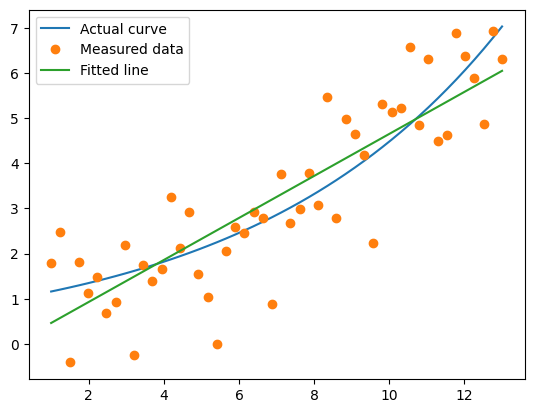

In [48]:
from scipy import optimize

def linear(x, a):
    # TO DO
    return a * x

def MSE(y_hat, y):
    # TO DO
    return np.mean((y_hat - y) ** 2)

def MSE_fit_func(params, func, x, y):
    return MSE(func(x, params), y)

fit = optimize.minimize_scalar(MSE_fit_func, method='Brent', args=(linear, samples, sim_data))

print(fit)
print(f"The value of a = {fit.x}")
print(f"The best MSE is: {fit.fun}")
plt.plot(samples, model_data, label='Actual curve')
plt.plot(samples, sim_data, 'o', label='Measured data')
plt.plot(samples, linear(samples, fit.x), label='Fitted line')
plt.legend()
plt.show()


<br>

---

### Q0.b Fitting a polynomial model (2 points) 

Now, the linear model is a pretty good fit, but the shopkeeper is not satisfied. Being a math hobbyist, she plans to create a new model using a $4^{th}$-order polynomial function:

$$y=b_0+b_1x+b_2x^2+b_3x^3+b_4x^4$$

* Write a function `polynomial` which implements this model, with the argument *b* being an *ndarray* containing all model parameters $b_0 \dots b_4$

When minimizing multiple parameters, we'll need to provide starting values for `b`, from where the minimization function will start the search. For now, you should use `np.array([-5, 9, -4, 1, .01])` as the starting point and we'll come back to selecting sensible starting values for the parameters later.

* Use the function [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to fit the polynomial model to the generated data from *Q0* using the `Nelder-Mead` method
* Plot the simulation data as dots and the fitted polynomial model as a (curved) line, both in the same plot
* Print the value of `b` that minimizes the polynomial model MSE on your data
* Print the value of the MSE of the best fitting model.

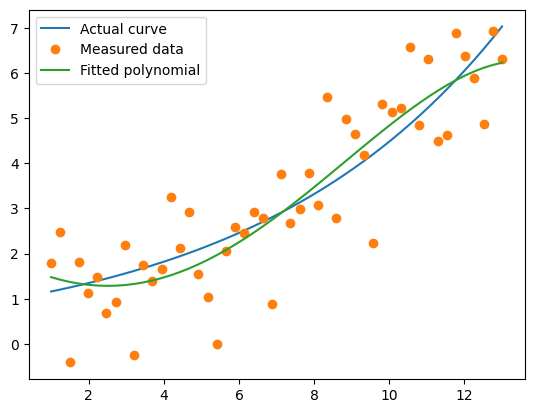

       message: Maximum number of function evaluations has been exceeded.
       success: False
        status: 1
           fun: 0.8640422739850696
             x: [ 1.819e+00 -4.190e-01  7.835e-02  2.420e-03 -3.048e-04]
           nit: 615
          nfev: 1000
 final_simplex: (array([[ 1.819e+00, -4.190e-01, ...,  2.420e-03,
                        -3.048e-04],
                       [ 1.820e+00, -4.201e-01, ...,  2.399e-03,
                        -3.042e-04],
                       ...,
                       [ 1.820e+00, -4.199e-01, ...,  2.409e-03,
                        -3.045e-04],
                       [ 1.819e+00, -4.190e-01, ...,  2.419e-03,
                        -3.047e-04]]), array([ 8.640e-01,  8.640e-01,  8.640e-01,  8.640e-01,
                        8.640e-01,  8.640e-01]))
The value of b = [ 1.81879852e+00 -4.18965432e-01  7.83527702e-02  2.42020389e-03
 -3.04774124e-04]
The best MSE is: 0.8640422739850696


In [49]:
def polynomial(x, b):
    # TO DO
    b0, b1, b2, b3, b4 = b
    return b0 + b1 * x + b2 * x**2 + b3 * x**3 + b4 * x**4

fit2 = optimize.minimize(MSE_fit_func, np.array([-5, 9, -4, 1, .01]), method='Nelder-Mead',
                        args=(polynomial, samples, sim_data))

# TO DO
plt.plot(samples, model_data, label='Actual curve')
plt.plot(samples, sim_data, 'o', label='Measured data')
plt.plot(samples, polynomial(samples, fit2.x), label='Fitted polynomial')
plt.legend()
plt.show()
print(fit2)
print(f"The value of b = {fit2.x}")
print(f"The best MSE is: {fit2.fun}")

---

### Q0.c Comparing models (4 points) 

Now, the linear model is a pretty good fit, but did the shopkeeper improve her model by making it more complex?

* Compare the MSE of both models and report which one has the best fit. 

### Answer
### The MSE of the polynomial fit is lower than the linear fit, this indicates a better fit, as it is closer to the actual data.

The shopkeeper did all her work in the winter, preparing for the summer to come. Hence, her models were fitted only to data corresponding to temperatures between 1 and 13. But now it is spring and new data is coming in. The shopkeeper will now use her best model to predict sales. However, she was surprised to learn what her model predicted!

* Report the prediction of the model for 18 degrees celcius (`x = 18`), how does that compare to the best day in winter (`x = 13`)?

In [50]:
# TO DO
# prediction for x = 18
prediction_18 = polynomial(18, fit2.x)
print(f"Prediction for x = 18: {prediction_18}")
prediction_13 = polynomial(13, fit2.x)
print(f"Prediction for x = 13: {prediction_13}")
# This is ofcourse wrong as with an increasing temperature, the icecream sales should increase.

Prediction for x = 18: 1.7843788900728512
Prediction for x = 13: 6.226400239434803


The shopkeeper is again collecting data for 50 days to get a better picture of what is going on. 

* Generate 50 uniformly spaced x-values over the interval `[13, 20]` using [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
* Apply the `curve` function (the exponential function introduced earlier) to the entire *ndarray* of x-values using [vectorize](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html)
* Create an *ndarray* of noise from a Gaussian distribution with $\mu = 0.0$ and $\sigma = 1.0$ using [random.normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html)
* Add the noise to the curve results to create the artificial simulation data

We assume that this newly added artificial data is actually real data observed by the shopkeeper. She now compares the predictions of her original two models with what really happened. 
* Plot the new data (with `x` ranging from 13 to 20) as dots and the earlier fitted linear and polynomial models as (curved) lines in the new plot. Make sure to add labels for clearer distinction.
* Compute and print the `MSE` for the new data (with `x` ranging from 13 to 20), for both of the earlier fitted models. Report which one has the best fit. Try to explain why.

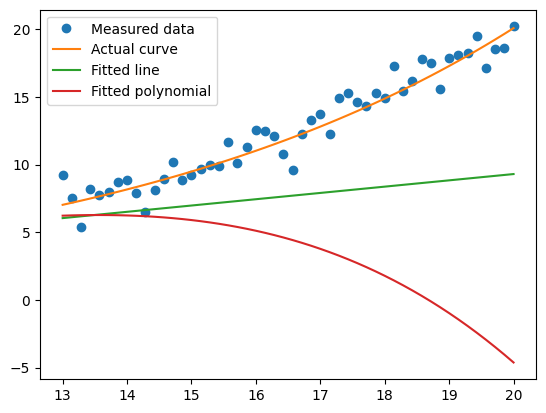

In [51]:
# TO DO plot
# The data
samples_new = np.linspace(13, 20)
model_data_new = np.vectorize(curve)(samples_new)
# The noise
noise_new = np.random.normal(size=samples_new.shape,loc=0, scale=1)
sim_data_new = model_data_new + noise_new
# plot the new data
plt.plot(samples_new, sim_data_new, 'o', label='Measured data')
plt.plot(samples_new, model_data_new, label='Actual curve')
plt.plot(samples_new, linear(samples_new, fit.x), label='Fitted line')
plt.plot(samples_new, polynomial(samples_new, fit2.x), label='Fitted polynomial')
plt.legend()
plt.show()

In [52]:
# TO DO print values
# compute MSE for both models with new data
mse_linear = MSE(linear(samples_new, fit.x), sim_data_new)
mse_polynomial = MSE(polynomial(samples_new, fit2.x), sim_data_new)
print(f"Linear MSE: {mse_linear}")
print(f"Polynomial MSE: {mse_polynomial}")

Linear MSE: 33.93622139781243
Polynomial MSE: 138.45029489411272


> Answer here\
The linear model preforms better than the polynomial model, as it does not decrease as fast as the polynomial. They are both very wrong, but the linear model is less wrong.


## Cognitive Model Fitting

In cognitive science, different models can represent different theories of how the mind works. These theories are formalized in mathematical equations. The different models will make different predictions about the cognitive processes of people and ultimately of their behavior. To differentiate between these models, they are often fit to real behavioral (or brain) data, and their "fit" to the data is compared. It is common practice to further "punish" models in relation the number of free parameters that they have (to prevent **overfitting**, see debacle with the polynomial above). We will get back to model fitting in part III below. 
<br>
<br>

---

# I. Q-Learning

Q-learning algorithmes zijn gebaseerd op de Temporal Difference learning modellen die we eerder hebben besproken. Q-learning leert direct de associatie tussen states, actions en outcomes. De robot krijgt nu dus niet alleen maar beloningen, maar kan ook uitzoeken welke handeling de beste is geveven de situatie.

Details over Q-learning zijn terug te vinden in de college slides en het hoofdstuk van Gureckis & Love [**computational reinforcement learning**](http://bradlove.org/papers/GureckisLovePress.pdf) en voor meer verdieping in het online boek van [**Sutton & Barto**](http://incompleteideas.net/book/bookdraft2018jan1.pdf) en dan met name hoofdstuk 6.

Het leren in deze opdracht speelt zich af in een simpel **Markov Decision Process** met de volgende structuur:

![](images/bandit_arms.png)

In deze taak moet de robot telkens uit één van de schatkisten iets pakken. Sommige schatkisten leveren meer geld op dan andere, maar de robot weet in het begin nog niks over de schatkisten, en verwacht er maar weinig van. In elke ronde wordt de uitkomst van een schatkist bepaald door een trekking van een waarde uit een normaalverdeling met een ander gemiddelde. Het is aan de robot om er achter te komen welke van de vier schatkisten het meeste oplevert. De vier normaalverdelingen behorende bij de vier schatkisten verschillen in hun gemiddelde maar niet in hun variantie (standaard deviatie). 

We gaan Q-learing gebruiken om te beschrijven hoe de robot leert om de beste keuze te maken. De update-regel voor de Q-waarde is als volgt:

$$ Q(s_t,a_t)= Q(s_t,a_t) + αδ $$

waarbij $s_t$ de state op tijdstip $t$ is, $a_t$ de actie op tijdstip $t$, en $\delta$ de prediction error. De actie is hier dus het kiezen van één van de kisten (totaal 4 mogelijke acties).

**Let op:** In dit simpele experiment is er maar één state, waarin de robot telkens terugkeert na het maken van een keuze. Dit heeft als gevolg dat bij het leren geen rekening gehouden hoeft te worden met de actie die in de volgende state gemaakt wordt. De standaard prediction-error:

$$\delta = r_{t+1} + \gamma\ max_a\ Q(s_{t+1} , a) − Q(s_t , a_t)$$

verandert daardoor nu in:
$$\delta = r_{t+1} − Q(s_t , a_t)$$

Aan het begin van het experiment heeft de robot geen enkele kennis van de wereld en geen enkele verwachtingen voor het krijgen van beloningen. Voor elke schatkist geldt:

$$Q(1)=Q(2)=Q(3)=Q(4)=0$$



### Q1.a (2 punten)

Schrijf de Q-learning functie op die de nieuwe waarde Q uitrekent nadat de robot een schatkist heeft uitgekozen. Deze functie is hierboven al gegeven, maar we willen hem nu als one-liner. In deze functie komt $\alpha$ voor. Wat is de rol van $\alpha$ bij het leren? 

> *Antwoord*\
Alpha dient als een learning rate parameter, die de delta (wat er geleerd wordt) kan verminderen met een alpha onder 1.\
\
One-liner: $$Q(s_t,a_t) \mathrel{+}= \alpha \cdot (r_{t+1} + \gamma\ max_a\ Q(s_{t+1} , a) − Q(s_t , a_t))$$

### Q1.b (2 punten)

Stel, de robot selecteert schatkist 1 en krijgt een beloning van 2 munten. Wat is hierna de waarde van $Q(1)$? Rapporteer dit voor
$\alpha=0.5$ en $\alpha=0.2$.

> *Antwoord*\
Voor $\alpha = 0.5$: $$Q(s_t,a_t) \mathrel{+}= 0.5 * (2 + \gamma\ max_a\ 0 − 0) = 0.5 * 2 = 1$$
Voor $\alpha = 0.2$: $$Q(s_t,a_t) \mathrel{+}= 0.2 \cdot (2 + \gamma\ max_a\ 0 − 0) = 0.2 * 2 = 0.4$$

### Q1.c (8 punten)

We gaan er nu van uit dat de robot de $\epsilon$-greedy keuzeregel toepast. Dus bij het exploreren (kans $\epsilon$) wordt er een random kist gekozen, en bij het exploiteren (kans $1-\epsilon$) wordt de kist met de hoogste Q-waarde gekozen. Als meerdere kisten de hoogste Q-waarde hebben, dan wordt daar random één van gekozen.

Schrijf een functie `q_learn` die $\alpha$ (alpha), $\epsilon$ (epsilon) en het aantal rondes (trials) als input accepteert. De output van deze functie moet onder andere een lijst `Q` bevatten met $Q$-waarden voor elke schatkist (1 t/m 4) in de wereld van de robot na het leren gedurende het gegeven aantal rondes. 

* Initieer de verwachtingen van de robot voor de 4 schatkisten:
    * $Q(1) = Q(2) = Q(3) = Q(4) = 0$.
* Initieer de lijst met alle verkregen beloningen: `outcomes = []`
* Initieer de som van alle verkregen beloningen: `total_score = 0`
* Initieer keuzelijsten:
    * `choice_1 = np.zeros(trials)`
    * `choice_2 = np.zeros(trials)`
    * `choice_3 = np.zeros(trials)`
    * `choice_4 = np.zeros(trials)`
* Initieer de parameters van de normaalverdelingen waaruit de beloningen van de 4 schatkisten telkens worden getrokken:
    * Kist 1: mean=20, SD=4
    * Kist 2: mean=30, SD=4
    * Kist 3: mean=50, SD=4
    * Kist 4: mean=70, SD=4
* Creëer een for-loop over alle rondes:
    * Elke ronde selecteert de robot een kist op basis van $\epsilon$-greedy. __Let op:__ e-greedy kan afwijken van de formules in het college. Dit is correct:
    ```python
            if random.random() < epsilon:
                # explore
            else:
                # exploit
    ```
    * Als de robot in de ronde met index `i` (zero-based indexing) kiest voor schatkist `j`, dan update je `choice_j[i] = 1`.
    * Kijk wat de beloning is na het maken van een keuze, en update de Q-waarde van de gekozen kist. Append de verkregen beloning aan de lijst `outcomes`, en tel de verkregen beloning op bij `total_score`.


In [53]:
def q_learn(alpha, epsilon, trials=200):
    # TO DO
    Q = np.array([0, 0, 0, 0])
    outcomes = []
    total_score = 0
    choice_1 = np.zeros(trials)
    choice_2 = np.zeros(trials)
    choice_3 = np.zeros(trials)
    choice_4 = np.zeros(trials)

    kist_1 = np.random.normal(loc=20, scale=1, size=4)
    kist_2 = np.random.normal(loc=30, scale=1, size=4)
    kist_3 = np.random.normal(loc=50, scale=1, size=4)
    kist_4 = np.random.normal(loc=70, scale=1, size=4)

    for i in range(trials):
        if np.random.rand() < epsilon:
            action = np.random.randint(0, 4)
        else:
            action = np.argmax(Q)

        if action == 0:
            reward = kist_1[i % 4]
            choice_1[i] = 1
        elif action == 1:
            reward = kist_2[i % 4]
            choice_2[i] = 1
        elif action == 2:
            reward = kist_3[i % 4]
            choice_3[i] = 1
        else:
            reward = kist_4[i % 4]
            choice_4[i] = 1

        Q[action] += alpha * (reward - Q[action])
        total_score += reward
        outcomes.append(reward)
    return (Q, total_score, choice_1, choice_2, choice_3, choice_4, outcomes)

Laat met behulp van deze functie de robot 200 rondes leren over deze wereld (1 leer-episode bestaat dus uit 200 rondes). Wat zijn de verwachtingen (Q-waarden) voor de schatkisten aan het eind van het experiment? En wat is de totale score? Geef voor:

1. $\alpha = 0.1$ en $\epsilon = 0.1$
2. $\alpha = 0.5$ en $\epsilon = 0.1$

__Let op:__ We hebben te maken met toevalsexperimenten, dus iedere keer dat je je code runt zal de output anders zijn. Run je code daarom meerdere keren (voor beide waarden van $\alpha$), bekijk telkens de output, en rapporteer vervolgens de output (Q-waarden en totale score) van een leer-episode die jij representatief vindt voor alles wat je langs hebt zien komen. Tip: na het maken van Q1.d zal je een beter beeld hebben van wat representatief is.

In [54]:
# TO DO
res_01_01 = q_learn(0.1, 0.1, trials=200)
res_05_01 = q_learn(0.5, 0.1, trials=200)

print(f"Total score for alpha=0.1, epsilon=0.1: {res_01_01[1]}")
print(f"Total score for alpha=0.5, epsilon=0.1: {res_05_01[1]}")


Total score for alpha=0.1, epsilon=0.1: 9571.638555981743
Total score for alpha=0.5, epsilon=0.1: 12270.369556011687


Laat nu voor beide modellen zien hoe de keuzes voor de verschillende kisten veranderen gedurende de trials door middel van 2 plots (model 1: $\alpha = 0.1$ en $\epsilon = 0.1$) (model 2: $\alpha = 0.5$ en $\epsilon = 0.1$). Voor het plotten van de keuzes is het handig om naar de keuzeratio's (op een schaal van 0 tot 1) per 10 trials te kijken. Bijvoorbeeld: een keuzeratio van 1.0 voor schatkist 4 voor de eerste 10 trials wil zeggen dat schatkist 4 gedurende die 10 trials elke keer is gekozen door de robot. Deze code kun je gebruiken voor je plot behorende bij model 2 (kopieer en pas zelf aan voor de plot behorende bij model 1):
```python
res_05_01 = q_learn(0.5, 0.1)   # roep functie aan voor model 2
width = 10                      # de grootte van de bin

# bereken de keuzeratio's voor alle schatkisten, voor alle bins
result1 = res_05_01[2].reshape(-1, width).mean(axis=1)
result2 = res_05_01[3].reshape(-1, width).mean(axis=1)
result3 = res_05_01[4].reshape(-1, width).mean(axis=1)
result4 = res_05_01[5].reshape(-1, width).mean(axis=1)

# Plot
plt.plot(result1, label=r"$1$")
plt.plot(result2, label=r"$2$")
plt.plot(result3, label=r"$3$")
plt.plot(result4, label=r"$4$")
plt.legend()
plt.ylabel("choice ratio")
plt.xlabel("trials * 10")
plt.show()
```

__Let op:__ We hebben te maken met toevalsexperimenten, dus iedere keer dat je je code runt zullen de plots anders zijn. Run je code daarom meerdere keren (voor beide modellen), bekijk telkens de resulterende plots, en voeg vervolgens plots in die jij representatief vindt voor alles wat je langs hebt zien komen. Tip: na het maken van Q1.d zal je een beter beeld hebben van wat representatief is.

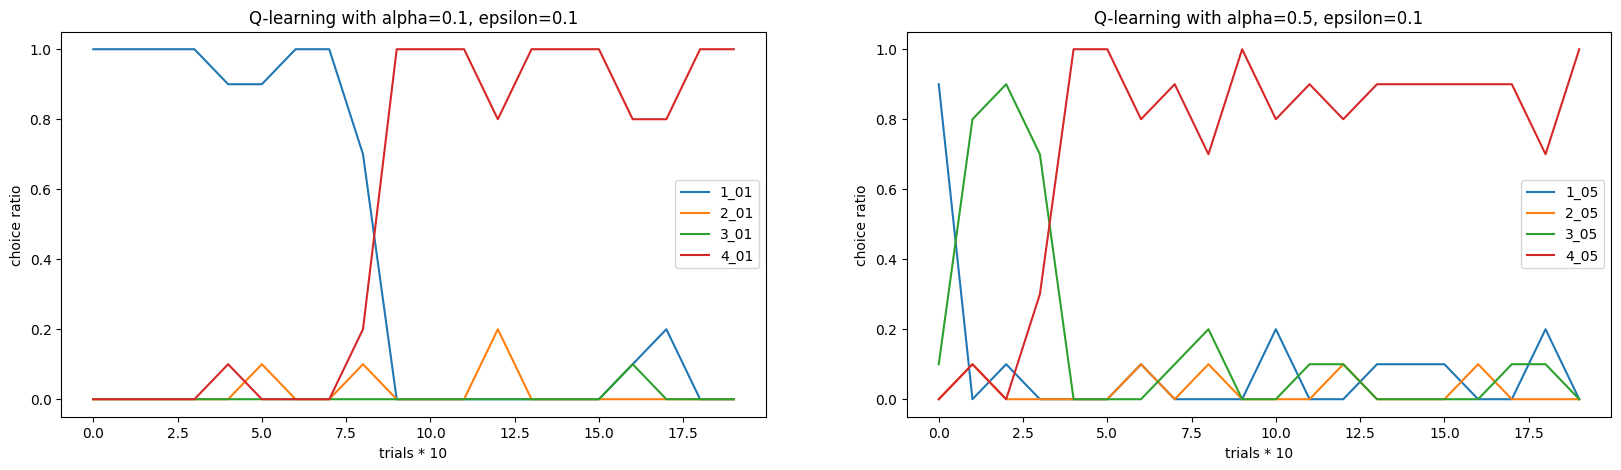

In [55]:
# TO DO plot
width = 10                      # de grootte van de bin

# bereken de keuzeratio's voor alle schatkisten, voor alle bins
result1 = res_05_01[2].reshape(-1, width).mean(axis=1)
result2 = res_05_01[3].reshape(-1, width).mean(axis=1)
result3 = res_05_01[4].reshape(-1, width).mean(axis=1)
result4 = res_05_01[5].reshape(-1, width).mean(axis=1)

result1_1 = res_01_01[2].reshape(-1, width).mean(axis=1)
result2_1 = res_01_01[3].reshape(-1, width).mean(axis=1)
result3_1 = res_01_01[4].reshape(-1, width).mean(axis=1)
result4_1 = res_01_01[5].reshape(-1, width).mean(axis=1)

# Plot
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.plot(result1_1, label="1_01")
plt.plot(result2_1, label="2_01")
plt.plot(result3_1, label="3_01")
plt.plot(result4_1, label="4_01")
plt.legend()
plt.ylabel("choice ratio")
plt.xlabel("trials * 10")
plt.title("Q-learning with alpha=0.1, epsilon=0.1")
plt.subplot(122)
plt.plot(result1, label="1_05")
plt.plot(result2, label="2_05")
plt.plot(result3, label="3_05")
plt.plot(result4, label="4_05")
plt.legend()
plt.ylabel("choice ratio")
plt.xlabel("trials * 10")
plt.title("Q-learning with alpha=0.5, epsilon=0.1")
plt.show()

Terugblikkend op je vorige twee antwoorden:
* Welk van de twee modellen zit doorgaans dichter bij de waarheid als je kijkt naar de Q-values? 
* Welk model behaalt doorgaans een hogere totale score? 
* Leg aan de hand van de plots uit waar de verschillen vandaan komen

> *Antwoord*\
1. Het model met een alpha van 0.5 lijkt over het algemeen dichter bij de waarheid omdat het eerder leert dat schatkist 4 beter is dan de rest.\
2. Omdat het model met een alpha van 0.5 eerder leert dat kist 4 de betere reward heeft, zal dit model ook de hogere totale waarden hebben.\
3. Bijde modellen kiezen kist vier op ongeveer hetzelfde moment (door exploratie),\
maar het model met alpha 0.5 geeft meer waarde aan de bevinding dat kist 4 meer reward geeft.

### Q1.d (4 punten)

Laten we nu verder kijken naar de verschillende leermodellen (lees: combinaties van parameterwaardes). Je zal in de vorige onderdelen hebben ervaren dat er veel random noise is. Als gevolg van de random noise kan het gebeuren dat in één leerepisode de beste kist niet gevonden wordt. Het is daarom goed om naar het gemiddelde te kijken van meerdere runs om een beter beeld te krijgen van een specifiek algoritme.  

Schrijf nu een loop die `q_learn` 500 keer aanroept met een bepaalde parametersetting (en nog altijd 200 leerrondes) en sla telkens de totale score op, zodat je aan het eind een lijst hebt van 500 totale scores.

Vergelijk het gemiddelde van de 500 totaalscores voor $\alpha=0.1$, $\alpha=0.3$ en $\alpha=0.5$. Gebruik $\epsilon=0.1$ voor alle experimenten. Verklaar hoe de verschillen tot stand komen. 


In [56]:
# TO DO
res_01_01 = []
res_03_01 = []
res_05_01 = []
for i in range(500):
    res_01_01.append(q_learn(0.1, 0.1, trials=200)[1])
    res_03_01.append(q_learn(0.3, 0.1, trials=200)[1])
    res_05_01.append(q_learn(0.5, 0.1, trials=200)[1])

print(f"Total score for alpha=0.1, epsilon=0.1: {np.mean(res_01_01)}")
print(f"Total score for alpha=0.3, epsilon=0.1: {np.mean(res_03_01)}")
print(f"Total score for alpha=0.5, epsilon=0.1: {np.mean(res_05_01)}")

Total score for alpha=0.1, epsilon=0.1: 9974.389795102541
Total score for alpha=0.3, epsilon=0.1: 11407.452690372047
Total score for alpha=0.5, epsilon=0.1: 11868.197722078628


> *Antwoord*\
Het grootste verschil is tussen alpha=0.1 en alpha=0.3, dit komt hoogst waarschijnlijk door de eerdere constante keuze van kist 4 boven alle andere kisten. Bij alpha=0.5 is het verschil met alpha=0.3 erg klein, dit komt waarschijnlijk omdat de limit van het kiezen van kist 4 niet meer ligt aan de hoeveelheid verwachte waarde die aan kist 4 gegeven word (dit is wat alpha beinvloed), maar door het moment (trail) dat kist 4 voor het eerst gekozen word, dit is namelijk hetzelfde voor alle modellen.

---

# II. Exploration-Exploitation

## 2.  $\epsilon$-greedy

We gaan nog wat dieper in op het exploration vs. exploitation dilemma. De robot gebruikt nu de meest simpele exploratieregel: $\epsilon $-greedy. Laten we kijken hoe verschillende waardes voor  $\epsilon$ uitwerking hebben op de totale score die behaald wordt. 

Gebruik hier de functie `q_learn` met $\epsilon=0.05$, $\epsilon=0.2$ en $\epsilon=0.6$. Gebruik $\alpha=0.3$ voor alle experimenten. 

### Q2.a (4 punten)

Kijk voor elke parametersetting weer naar de gemiddelde totaalscore van 500 leer-episodes. Waar ligt ongeveer het optimale niveau van exploratie? Probeer te verklaren waarom de alternatieven minder goede resultaten opleveren (bijvoorbeeld waarom is een te hoge of juist te lage $\epsilon$ niet goed).

In [57]:
# TO DO
res_03_005 = []
res_03_02 = []
res_03_06 = []
for i in range(500):
    res_03_005.append(q_learn(0.3, 0.05, trials=200)[1])
    res_03_02.append(q_learn(0.3, 0.2, trials=200)[1])
    res_03_06.append(q_learn(0.3, 0.6, trials=200)[1])

print(f"Total score for alpha=0.3, epsilon=0.05: {np.mean(res_03_005)}")
print(f"Total score for alpha=0.3, epsilon=0.2: {np.mean(res_03_02)}")
print(f"Total score for alpha=0.3, epsilon=0.6: {np.mean(res_03_06)}")

Total score for alpha=0.3, epsilon=0.05: 10518.181050996272
Total score for alpha=0.3, epsilon=0.2: 11908.330700792896
Total score for alpha=0.3, epsilon=0.6: 10526.18372402493


> *Antwoord*\
De totale waardes van epsilon=0.05 en epsilon=0.6 liggen heel dicht bij elkaar, dit is hoogstwaarschijnlijk omdat 0.05 zorgt dat kist 4 pas heel laat word gekozen, epislon 0.6 zorgt voor veel random keuzes en daarom is het moeilijk de score te optimizen. De 0.2 waarde voor epsilon lijkt een sweetspot te zijn (in iedergeval vergeleken met 0.05 en 0.6) omdat de totale waarde significant hoger ligt.

### Q2.b (4 punten)
In Machine Learning en Deep Neural Nets wordt nog steeds vaak gebruik gemaakt van $\epsilon$-greedy, ook al is dit niet een exploratieregel die mensen lijken te gebruiken. Ook hier is het kiezen van een goede waarde voor $\epsilon$ vaak het resultaat van trial en error. Het kan dus zo zijn dat de onderzoeker niet de optimale waarde kiest. Een regel die vaak wordt toegepast is dat de waarde van $\epsilon$ afneemt gedurende het experiment. 

Pas nu `q_learn` zo aan dat de parameter $\epsilon$ gedurende een leer-episode (dus gedurende 200 trials) steeds kleiner wordt. Verschillende manieren zijn mogelijk, maar doe dit in deze opgave door na elke trial $\epsilon$ met een vast percentage te verkleinen (denk aan iets tussen 0 en 10%). Sla dit model op als `q_learn_decay()`. Schrijf de functie zodanig dat het invullen van bijvoorbeeld `decay = 0.05` ertoe leidt dat $\epsilon$ na elke trial met 5% wordt verlaagd.

In [58]:
def q_learn_decay(alpha, epsilon, trials=200, decay=0):
    # TO DO
    Q = np.array([0, 0, 0, 0])
    outcomes = []
    total_score = 0
    choice_1 = np.zeros(trials)
    choice_2 = np.zeros(trials)
    choice_3 = np.zeros(trials)
    choice_4 = np.zeros(trials)

    kist_1 = np.random.normal(loc=20, scale=1, size=4)
    kist_2 = np.random.normal(loc=30, scale=1, size=4)
    kist_3 = np.random.normal(loc=50, scale=1, size=4)
    kist_4 = np.random.normal(loc=70, scale=1, size=4)

    for i in range(trials):
        epsilon *= 1 - decay
        if np.random.rand() < epsilon:
            action = np.random.randint(0, 4)
        else:
            action = np.argmax(Q)

        if action == 0:
            reward = kist_1[i % 4]
            choice_1[i] = 1
        elif action == 1:
            reward = kist_2[i % 4]
            choice_2[i] = 1
        elif action == 2:
            reward = kist_3[i % 4]
            choice_3[i] = 1
        else:
            reward = kist_4[i % 4]
            choice_4[i] = 1

        Q[action] += alpha * (reward - Q[action])
        total_score += reward
        outcomes.append(reward)
    return (Q, total_score, choice_1, choice_2, choice_3, choice_4, outcomes)

### Q2.c (4 punten)

Onderzoek weer de gemiddelde totaalscore over 500 leer-episodes, maar nu voor `q_learn_decay`. Verken waarden van $\epsilon$ tussen .1 en .9. Gebruik hierbij wederom 200 rondes per leer-episode, en gebruik $\alpha =  0.3$ en `decay = 0.05`. Voor welke waarden van $\epsilon$ presteert `q_learn_decay` het best? Waarom denk je dat dat zo is? Kun je voor het behalen van een hoge totaalscore beter `q_learn` of `q_learn_decay` gebruiken?

In [59]:
# TO DO
res_03_01 = []
res_03_03 = []
res_03_05 = []
res_03_09 = []
alpha = 0.3
decay = 0.05
trails = 200
for i in range(500):
    res_03_01.append(q_learn_decay(alpha=alpha, epsilon=0.1, trials=trails, decay=decay)[1])
    res_03_03.append(q_learn_decay(alpha=alpha, epsilon=0.3, trials=trails, decay=decay)[1])
    res_03_05.append(q_learn_decay(alpha=alpha, epsilon=0.5, trials=trails, decay=decay)[1])
    res_03_09.append(q_learn_decay(alpha=alpha, epsilon=0.9, trials=trails, decay=decay)[1])

print(f"Total score for alpha=0.3, epsilon=0.1: {np.mean(res_03_01)}")
print(f"Total score for alpha=0.3, epsilon=0.3: {np.mean(res_03_03)}")
print(f"Total score for alpha=0.3, epsilon=0.5: {np.mean(res_03_05)}")
print(f"Total score for alpha=0.3, epsilon=0.9: {np.mean(res_03_09)}")

Total score for alpha=0.3, epsilon=0.1: 8037.461341275628
Total score for alpha=0.3, epsilon=0.3: 11011.50402002811
Total score for alpha=0.3, epsilon=0.5: 11915.398068538281
Total score for alpha=0.3, epsilon=0.9: 12763.754346501402


> *Antwoord*\
Uit de totaal scores van q-learn met decay blijkt dat dit model beter is voor het behalen van hoge totaal scores. De waarde van 0.9 voor epsilon is het beste, dit is waarschijnlijk omdat het voordelig is om veel exploration te doen in het begin, naarmate de epsilon daalt worden er steeds minder random keuzes gemaakt. De hoge waarde van epsilon heeft minder invloed op de daling dan je zou denken, omdat het procentueel is.

---

## 3. Softmax

Een andere, zeer populaire, methode om met het exploratie-explotatie dilemma om te gaan is de softmax beslisregel. Deze kan worden gebruikt om de kans uit te rekenen dat de robot een specifieke kist kiest. De kans dat de robot op een bepaald moment kist i kiest is:

$$P(\text{kist i}) = \frac{\exp(Q(i)\cdot\theta)}{\sum_s \exp(Q(s)\cdot\theta)}, \qquad \text{voor alle } i \in \{1, 2, 3, 4\}$$

De notatie $\exp(x)$ staat hier voor $e^x$. Natuurlijk geldt op ieder moment $P(\text{kist 1}) + P(\text{kist 2}) + P(\text{kist 3}) + P(\text{kist 4}) = 1$. De robot kiest immers altijd één van de 4 opties, dus bij elkaar opgeteld moeten de kansen 100% zijn.

De waarde van $\theta$ bepaalt de mate waarin het verschil in verwachte waarden (Q-waarden) de kans op een bepaalde keuze vergroot. Deze parameter wordt ook wel de *inverse temperature* genoemd. Als de waarde van $\theta$ *laag* is, is de temperatuur van de functie *hoog* en dan doet het verschil in Q-waarden er niet zoveel toe, dus worden er meer random keuzes gemaakt. Oftewel, er zal meer geëxploreerd worden. Dat getuigt van een zekere buigzaamheid, we zijn dan immers minder toegewijd aan een specifieke keuze. De term temperatuur komt van de analogie met het smeden van ijzer: bij een hoge temperatuur is ijzer makkelijker te buigen. 

### Q3 (6 punten)

Implementeer nu de softmax-regel door de code die je hebt geschreven voor de functie `q_learn` te kopiëren en aan te passen. Geef je nieuwe functie de naam `q_learn_softmax`.

Gebruik voor `q_lean_softmax` weer de gemiddelde totaalscore van 500 leer-episodes om verschillende waardes van $\theta$ met elkaar te vergelijken (tenminste vijf verschillende waardes tussen $0.01$ en $1$), met wederom 200 rondes per leer-episode en $\alpha=0.3$.

Wat is ongeveer de optimale waarde voor $\theta$?

In [84]:
def q_learn_softmax(alpha, theta, trials=200):
    # TO DO 
    Q = [[0], [0], [0], [0]]
    outcomes = []
    total_score = 0
    choice_1 = np.zeros(trials)
    choice_2 = np.zeros(trials)
    choice_3 = np.zeros(trials)
    choice_4 = np.zeros(trials)

    kist_1 = np.random.normal(loc=20, scale=1, size=4)
    kist_2 = np.random.normal(loc=30, scale=1, size=4)
    kist_3 = np.random.normal(loc=50, scale=1, size=4)
    kist_4 = np.random.normal(loc=70, scale=1, size=4)

    for i in range(trials):
        q_values = np.array([Q[j][-1] for j in range(4)])
        exp_q = np.exp(theta * q_values)
        P_i = exp_q / np.sum(exp_q)
        action = np.random.choice(len(Q), p=P_i)
        if action == 0:
            reward = kist_1[i % 4]
            choice_1[i] = 1
        elif action == 1:
            reward = kist_2[i % 4]
            choice_2[i] = 1
        elif action == 2:
            reward = kist_3[i % 4]
            choice_3[i] = 1
        else:
            reward = kist_4[i % 4]
            choice_4[i] = 1

        Q[action].append((alpha * (reward - Q[action][-1])))
        total_score += reward
        outcomes.append(reward)
    return (Q, total_score, choice_1, choice_2, choice_3, choice_4, outcomes)

# TO DO: vergelijk parameter waardes
res_03_001 = []
res_03_01 = []
res_03_02 = []
res_03_05 = []
res_03_07 = []
res_03_1 = []
alpha = 0.3
trails = 200
for i in range(500):
    res_03_001.append(q_learn_softmax(alpha=alpha, theta=0.01, trials=trails))
    res_03_01.append(q_learn_softmax(alpha=alpha, theta=0.1, trials=trails))
    res_03_02.append(q_learn_softmax(alpha=alpha, theta=0.2, trials=trails))
    res_03_05.append(q_learn_softmax(alpha=alpha, theta=0.5, trials=trails))
    res_03_07.append(q_learn_softmax(alpha=alpha, theta=0.7, trials=trails))
    res_03_1.append(q_learn_softmax(alpha=alpha, theta=1, trials=trails))

print(f"Total score for alpha=0.3, theta=0.01: {np.mean([result[1] for result in res_03_001])}")
print(f"Total score for alpha=0.3, theta=0.1: {np.mean([result[1] for result in res_03_01])}")
print(f"Total score for alpha=0.3, theta=0.2: {np.mean([result[1] for result in res_03_02])}")
print(f"Total score for alpha=0.3, theta=0.5: {np.mean([result[1] for result in res_03_05])}")
print(f"Total score for alpha=0.3, theta=0.7: {np.mean([result[1] for result in res_03_07])}")
print(f"Total score for alpha=0.3, theta=1: {np.mean([result[1] for result in res_03_1])}")

Total score for alpha=0.3, theta=0.01: 8681.470608936881
Total score for alpha=0.3, theta=0.1: 10181.739391382773
Total score for alpha=0.3, theta=0.2: 11618.057538431503
Total score for alpha=0.3, theta=0.5: 12120.695376964819
Total score for alpha=0.3, theta=0.7: 11131.23380096147
Total score for alpha=0.3, theta=1: 10441.371270319103


> *Antwoord*

We willen nu weten waar de verschillen vandaan komen. Laat zowel voor $\theta$ = $0.1$ als $\theta = 1$ zien wat de Q-waarden en totaalscore zijn na een leer-episode. Plot voor diezelfde leer-episode ook weer de keuzeratio's per 10 trials (zelfde als bij Q1.c).

__Let op:__ We hebben te maken met toevalsexperimenten, dus iedere keer dat je je code runt zullen de Q-waarden, totaalscores en plots anders zijn. Run je code daarom meerdere keren en rapporteer de output van een leer-episode die jij representatief vindt voor alles wat je langs hebt zien komen.

In [ ]:
# TO DO plot
width = 10                      # de grootte van de bin

# bereken de keuzeratio's voor alle schatkisten, voor alle bins
result1 = res_03_01[2].reshape(-1, width).mean(axis=1)
result2 = res_03_01[3].reshape(-1, width).mean(axis=1)
result3 = res_03_01[4].reshape(-1, width).mean(axis=1)
result4 = res_03_01[5].reshape(-1, width).mean(axis=1)

result1_1 = res_03_1[2].reshape(-1, width).mean(axis=1)
result2_1 = res_03_1[3].reshape(-1, width).mean(axis=1)
result3_1 = res_03_1[4].reshape(-1, width).mean(axis=1)
result4_1 = res_03_1[5].reshape(-1, width).mean(axis=1)

# Plot
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.plot(result1_1, label="1_01")
plt.plot(result2_1, label="2_01")
plt.plot(result3_1, label="3_01")
plt.plot(result4_1, label="4_01")
plt.legend()
plt.ylabel("choice ratio")
plt.xlabel("trials * 10")
plt.title("Q-learning with alpha=0.1, epsilon=0.1")
plt.subplot(122)
plt.plot(result1, label="1_05")
plt.plot(result2, label="2_05")
plt.plot(result3, label="3_05")
plt.plot(result4, label="4_05")
plt.legend()
plt.ylabel("choice ratio")
plt.xlabel("trials * 10")
plt.title("Q-learning with alpha=0.5, epsilon=0.1")
plt.show()

ValueError: cannot reshape array of size 1 into shape (10)

Wat laten deze waardes en grafieken je zien?

> *Antwoord*

---

## 4. Upper Confidence Bound

De softmax-regel is vaak al beter dan $\epsilon$-greedy, maar exploratie is nog steeds random. Als we kijken naar het gedrag van mensen, zien we dat mensen slim zijn en niet random verkennen (exploreren). Een zeer populaire methode om niet geheel random exploratie te implementeren is met Upper Confidence Bound exploratie. 

Volgens deze regel krijgen de mogelijke acties niet alleen een $Q$-waarde, maar ook een $Q'$-waarde. Steeds wordt de actie gekozen met de hoogste $Q'$-waarde. Als meerdere acties de hoogste $Q'$-waarde hebben, dan wordt random één van deze acties gekozen. De $Q'$-waarde van een actie wordt gegeven door haar $Q$-waarde *plus* een bonus $\eta$ om exploratie te stimuleren. Deze bonus maakt het model nieuwsgieriger. Hier is een populaire versie genaamd UCB1:

$$Q'(action) = Q(action)+ \eta(action)$$

$$\eta(action) = \sqrt{\frac{\theta \cdot \log(t)}{N_t(action)}}$$

Hierbij staat $t$ voor het rondenummer in het experiment (zero-based indexing), en $N_t$ voor het aantal keer dat de actie tot dusver gekozen is. De parameter $\theta$ schaalt de grootte van de exploratiebonus (met een hogere $\theta$ is de robot nieuwsgieriger). Bovendien: hoe minder vaak er voor $action$ is gekozen, hoe lager $N_t(action)$, hoe hoger $\eta(action)$, hoe hoger $Q'(action)$. Op deze manier wordt exploratie van weinig gekozen acties dus inderdaad gestimuleerd.

**Let op:** het algoritme kiest aan het begin van het experiment elke actie minstens één keer, en daarna wordt pas gekozen op basis van de hoogste $Q'$-waarde. In de huidige context wordt dus in de ronde met index $0,1,2,3$ respectievelijk kist $1,2,3,4$ gekozen, en daarna gaat de hierboven beschreven keuzeregel van start. 

### Q4.a (6 punten)

Implementeer nu de UCB1 exploratieregel op basis van de `q_learn` functie en geef deze de naam `q_learn_UCB`.

In [ ]:
def q_learn_UCB(alpha, theta, trials=200):
    # TO DO                  
    return (Q, total_score, choice_1, choice_2, choice_3, choice_4, outcomes)

* Reken voor `q_learn_UCB` weer de gemiddelde totaalscore voor 500 leer-episodes uit voor $\theta = 2$ (default voor UCB1), met wederom 200 rondes per episode en $\alpha = 0.3$.
* Plot ook weer de keuzeratio's per 10 trials (zoals bij Q1.c).

In [ ]:
# TO DO gemiddelde
# TO DO plot

* Als je kijkt naar de implementatie, hoe verhoudt dit model zich tot de simpele versie van $\epsilon$-greedy en soft-max? 
* Kijk ook naar het aantal punten dat het behaalt, waar komt het verschil in prestatie vandaan?

> *Antwoord*

### Q4.b (6 punten) 
De exploration-exploitation trade-off wordt al lange tijd onderzocht en is een van de meest interessante problemen in reinforcement learning. In dit voorbeeld was het best makkelijk voor het algoritme om de oplossing te vinden omdat de 4 schatkisten redelijk veel verschilden van elkaar, maar dit is niet altijd het geval. Kijk maar eens wat er gebeurt als je de standaarddeviatie in `q_learn_UCB` van 4 naar 10 verandert, of als je de means dichter bij elkaar zet. Dan zal je ook zien dat je een hogereexploratie waarde $\theta$ nodig hebt om tot de beste oplossing te komen.

* Verander de SD en means van de schatkisten: <br>
    `means = [20, 30, 35, 45]`<br>
    `std_dev = 10`
* Simuleer nu weer voor verschillende waardes van $\theta$ het algoritme voor 500 leer-epsiodes met ieder 200 trials (verken tenminste vier $\theta$-waardes tussen $2$ en $50$);
* Rapporteer de gemiddelde totaalscores en de beste $\theta$-waarde.


In [ ]:
def q_learn_UCB_new(alpha, theta, trials=200):
    # TO DO                     
    return (Q, total_score, choice_1, choice_2, choice_3, choice_4, outcomes)

> *Antwoord*

### Samenvatting

In de simpele wereld van 4 schatkisten (jargon: 'bandits') is nog met enige moeite uit te vinden welk niveau van exploratie optimaal is, maar dit kost veel tijd. Daarnaast is de echte wereld nog veel complexer, dus dan is het helemaal moeilijk om uit te zoeken wat het beste niveau van exploratie is. Het blijft dus altijd een vraag hoe slimme systemen bepalen hoeveel of weinig zij gaan exploreren. Bij mensen lijken hier ook grote individuele verschillen in te zitten: de een is avontuurlijker dan de ander en mensen passen hun exploratiegedrag aan op de omgeving.

#### Curiosity-based exploration in complex systems
Voor een veel complexer maar interessant voorbeeld is het leuk om te kijken naar: [Curiosity-driven Exploration by Self-supervised Prediction](https://pathak22.github.io/noreward-rl/). In dit paper probeert een agent de omgeving zo te verkennen dat het op zoek gaat naar states waar het meest over te leren valt, net als UCB. Door alleen heel nieuwsgierig te zijn zorgt het algoritme er al voor dat het heel ver kan komen in bepaalde games, zonder dat beloningen (bv punten) daar een belangrijke rol in spelen!

---

# III. Model fitting

## 5. De vier schatkisten, menselijke keuzes

We gaan nu kijken naar de resultaten van een echt experiment. We hebben de data van een proefpersoon die het bovenstaande experiment met de vier kisten echt heeft gespeeld (let op: wel met andere means). In de *L4_data_1.txt* file kunnen we terugvinden welke van de 4 opties zij gekozen had en hoeveel punten er vervolgens in elke trial verdiend zijn. We gaan kijken welke parameterwaardes het gedrag van de proefpersoon het beste voorspellen als we gebruik maken van Q-learning met een softmax keuzeregel. De proefpersoon heeft 80 rondes gespeeld. 

Lees de data in uit *L4_data_1.txt* (staat in de Data map) met behulp van [loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html):
```python
with open("Data\L4_data_1.txt") as f:
    data = np.loadtxt(f, dtype=int, delimiter="\t", skiprows=1)
```

Mocht je moeite hebben met het inlezen van het bestand, probeer dan (ook van toepassingen voor latere inlees-code in deze notebook):
```python
from pathlib import Path

with open(Path("Data") / "L4_data_1.txt") as f:
    data = np.loadtxt(f, dtype=int, delimiter="\t", skiprows=1)
```

We pasen de `q_learn_softmax` functie aan zodat je deze op de data van de proefpersoon kan fitten (zie eerdere opdracht over hoe functies gefit moeten worden en code onderaan voor meer hulp).

We gaan ervan uit dat de proefpersoon enige ervaring heeft met dit type experiment en verwachten dat ze gemiddeld wel 40 punten per ronde gaat verdienen (alle Q’s starten op 40 ipv 0). Voor het fitten van het model maken we gebruik van `minimize` van scipy.optimize (`from scipy.optimize import minimize`) en we gaan proberen de *Log Likelihood (LL)* te optimaliseren (= maximaliseren). 

Wat we bij elke trial willen weten is de kans dat het model dezelfde keuze maakt als de proefpersoon. Hoe groter de kans (likelihood) dat het model correct kiest, hoe beter het model "fit". 

In het databestand van de proefpersoon kun je zien welke van de 4 kisten de proefpersoon koos. Dit kunnen we elke ronde vergelijken met de corresponderende keuzekansen volgens het model. In de eerste ronde zijn alle Q values nog gelijk dus $P(\text{kist 1}) = P(\text{kist 2}) = P(\text{kist 3}) = P(\text{kist 4}) =  0.25$. Voor de eerste ronde geldt daarom automatisch dat de kans (likelihood) dat de keuze van het model overeenkomt met de keuze van de proefpersoon ook 0.25 is, maar dat gaat veranderen naarmate er geleerd wordt.

De output van deze functie moet de som van alle $\log(P(\text{kist gekozen}))$ zijn. Let op, deze som wordt vermenigvuldigd met -1 omdat minimize de functie probeert te *minimaliseren*, en we zijn op zoek naar het *maximum* van de log likelihood. 

`**example code**:`
```python
from scipy.optimize import minimize

with open("Data\L4_data_1.txt") as f:
    data = np.loadtxt(f, dtype=int, delimiter="\t", skiprows=1)

def q_learn_softmax_fit(params):
    alpha, theta, init_value = params
    nArms = 4
    Q = np.array([init_value]*nArms)
    LL = 0
    
    # loop over all trials
    for row in data:
        
        # bereken de kans (probs) dat elke kist gekozen wordt
        probs = np.power(np.e, theta*Q)
        probs /= sum(probs)
        
        choice = row[1]-1   # de keuze van de proefpersoon
        outcome = row[2]    # de uitkomst van de keuze
        
        # bereken de log likelihood van de keuze van de proefpersoon (choice)
        # Gegeven de huidige Q values van het model, hoe groot was de kans (likelihood) 
        # dat deze specifieke kist gekozen werd?
        LL += np.log(probs[choice]) # houd de som van alle LL bij. 
        
        # Update de Q-values, gegeven de werkelijke keuze en ook de werkelijke outcome 
        # gebruik daarbij vrije parameter alpha, de learning rate, we proberen de optimale waarde hiervan te vinden
        Q[choice] = Q[choice] + alpha * (outcome - Q[choice])
    
    # Schaal met -1 om de functie te kunnen minimizen
    return -1*LL

# minimize takes a few arguments (function, array of initial parameter values, minimization methods,
# bounds are the bounds on each parameter; use bounds (same, same) to fix parameter to a single value
res = minimize(q_learn_softmax_fit, 
               np.array([0.5, 0.5, 40]), 
               method='SLSQP',
               bounds=[(0,1), (0,10), (40,40)], 
               options={'disp':True, 'ftol':1e-16})
```

### Q5.a (7 punten)

* Gebruik deze functie en fit het model. 
* Welke parameterwaarden fitten de data van de proefpersoon het beste? 
* Wat kan je zeggen over hoe goed het model de keuzes van de proefpersoon voorspelt? (Geef gemiddelde likelihood per trial en wat dat betekent.) <br>

    _Minimize geeft de uiteindelijke summed LL (negatief) van het best fittende model. Deze score kan je weer terugrekenen naar een gemiddelde likelihood  per trial: de kans dat het model juiste trial koos. Doe dit en beoordeel de uitkomst. Hints: deel de output door het aantal trials, gebruik de inverse $e^x$ van $\log(x)$._

In [ ]:
# TO DO

> *Antwoord*

<br>

### Q5.b (4 punten)

Als we de functie een klein beetje herschrijven kunnen we deze gebruiken om in het hoofd van de proefpersoon te kijken. Nu willen we bijvoorbeeld weten welke Q-values zij aan de verschillende kisten toekent. 

Hiervoor is alleen een kleine verandering nodig, waarbij de functie nu niet meer de Log Likelihood als output heeft maar de lijst met Q-values. Pas de functie `q_learn_softmax_fit` aan zodat deze de Q-values returnt en noem de nieuwe functie `q_learn_fitted_model`. Zorg hierbij dat de `params` lijst van argumenten ook hetzelfde blijft als bij de `q_learn_softmax_fit`.

Nu hoef je ook niet meer de functie te fitten of minimalizeren maar alleen aan te roepen, gebruikmakende van de beste gevonden `params` van de vorige stap.

`q_learn_fitted_model(res.x)`

Rapporteer de Q-values van deze proefpersoon. In werkelijkheid waren de gemiddelde beloningen van de kisten (50, 30, 20, 80). Hoe wijkt de proefpersoon hier van af en hoe is dat te verklaren? (Hint: kijk naar het keuzegedrag in de data file.)


In [ ]:
def q_learn_fitted_model(params):
    # TO DO
    return Q

q_learn_fitted_model(res.x)

NameError: name 'res' is not defined

> *Antwoord*

---

## 6. Two-armed Bandits


We gaan nu kijken naar de resultaten van een ander experiment. Net als bij het vorige experiment is er telkens een keuze tussen opties die verschillende beloningen opleveren. In het eerdere voorbeeld waren het schatkisten, maar in de meeste experimenten zijn dit gokkasten (ook wel bandits genoemd omdat ze uiteindelijk met je geld er vandoor gaan). 

<img src="Images\2bandits.png" alt="Drawing" style="width: 600px;"/>

In deze versie van het experiment heeft de proefpersoon telkens de keuze tussen twee machines. Anders dan de kisten, geven deze machines wel of geen beloning. De ene machine geeft de beloning met een grotere kans (80%) dan de andere (20%). 
Net als hierboven kan je in een data file (*RL_data2.csv*) terugvinden welke van de opties de proefpersoon gekozen heeft en hoeveel punten er verdiend zijn. Er waren in totaal 8 paren van bandits, dus 16 objecten in totaal. 

Lees de data in uit *RL_data2.csv* (staat in de Data map) met behulp van [loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html):
```python
with open("Data\RL_data2.csv") as f:
    data = np.loadtxt(f, dtype=int, delimiter=",", skiprows=1)
```
De headers in de file geven aan welke data er in de kolommen te vinden is: <br>
`playerID` is de identificatie van de speler, `trial` is het trial nummer, `outcome` is de uitkomst van de keuze, `pairz` geeft aan welke paar zichtbaar was, waar paar 1 bestaat uit stimulus (object) 1 en 2, paar 2 uit stimulus 3 en 4, etc. Dan staat er in de kolom `choice` welke van de twee objecten gekozen is.

Schrijf een nieuwe `q_learn_softmax_fit` functie zodat je deze op de data van de proefpersonen kan fitten. Ga er van uit dat de proefpersonen _geen_ ervaring heeft met dit type experiment en verwachten dat hij/zij gemiddeld  0 punten per ronde gaat verdienen (alle Q’s starten op 0). 

### Q6.a (5 punten)

Fit het aangepaste model op de data van deze taak. Let er goed op dat voor het berekenen van de probabiliteit van het kiezen van een bepaalde stimulus je alleen rekening moet houden met de Q value van het alternatief binnen hetzelfde paar, niet de Q values van alle andere stimuli (zoals hierboven). Dus als pair 5 wordt aangeboden zie je alleen stim 9 en 10 en moet je alleen rekenen met $Q(9)$ en $Q(10)$.

* Rapporteer de waardes van $\alpha$, $\theta$ en de Log Likelihood. 



In [ ]:
# TO DO

### Model improvements

Deze simpele 2-armed Bandit taak wordt heel veel gebruikt om onderzoek te doen bij mensen en dieren. Deze taak is bijvoobeeld bij mensen en dieren afgenomen om leren in het brein te kunnen bestuderen. Het is een simpele taak, maar deze heeft veel inzichten gegeven in hoe mensen leren, inzichten die soms ook weer vertaald zijn naar de ontwikkeling van bijvoorbeeld DNNs en andere toepassingen in de kunstmatige intelligentie.

Verbeteringen en uitbreidingen op het leermodel zijn vaak geïnspireerd door observaties van gedrag. Zoals we bij model fitting hebben geleerd, worden deze modellen getoetst door te kijken of de uitbreidingen ook echt leiden tot een betere fit. Hier ga je een aantal van deze verbeteringen bedenken en uitwerken. 

### Q6.b Dual Learning rates (5 punten)
Het blijkt dat mensen en dieren anders reageren op beloning en straf (zie ook colleges week 1). Dat is iets wat niet in het standaard Q-learning model meegenomen is. Schrijf nu een versie van q-learning die dat wel doet: `q_learn_softmax_fit_dual`. Gezien de titel van deze vraag kan je al raden dat dit kan door twee verschillende learning rates ($\alpha_{gain}$ en $\alpha_{loss}$) te introduceren. Het makkelijkste is om voor deze opdracht deze twee learning rates te associeren met positive en negatieve prediction errors.

* Rapporteer de waardes van $\alpha_{gain}$, $\alpha_{loss}$, $\theta$ en de Log Likelihood. 
* Is dit model inderdaad een betere fit? Wat geeft het verschil in learning rates aan? 

In [ ]:
def q_learn_softmax_fit_dual(params):
    # TO DO
    return

> *Antwoord*

### Q6.c Meta Learning (6 punten)
Iets anders wat opvalt bij het leerpatroon van mensen is dat ze langzaam maar zeker de structuur van de taak zelf door krijgen. Dat wordt ook wel meta-leren genoemd. Ook dit is een belangrijk onderdeel van leren, en krijgt wederom veel aandacht binnen de AI gemeenschap (zie ook Lake et al. paper). Want door de structuur van een taak te leren kan er sneller en beter geleerd worden in toekomstige trials, maar deze kennis kan ook van toepassing zijn in nieuwe vergelijkbare situaties. 

Denk bijvoorbeeld aan het spelen van Super Mario. In het eerste level leer je veel over de structuur van het spel, paddestoelen zijn bijvoorbeeld goed en schildpadden slecht. Handige informatie voor in het volgende level, maar ook voor in een soortgelijk spel: Sonic the Hedgehog (in AI onderzoek zijn deze oude spelen weer helemaal populair). 

De two bandits taak is erg simpel, maar er zit wel een structuur in, namelijk: van elk paar is altijd één van de twee bandits goed en de ander slecht. Ook verschillen de kansen op positieve en negatieve feedback maar minimaal. Als je feedback krijgt over één van de twee opties in een paar, leer je eigenlijk ook al iets over de ander. 

Jouw opdracht is om het algoritme aan te passen op een manier dat het deze kennis van de taak gebruikt. Laat zien hoe het model fit op de data fit. Het gaat nu meer om de implementatie van de kennis over de taak, het is niet erg als het model minder goed fit. 

* Schrijf een nieuw algortime
* Motiveer je keuzes
* Evalueer je model (parameter waardes, en LogLikelihood). 

In [ ]:
# TO DO

> *Antwoord*

### Q6.d Dynamic Learning rates (5 bonus punten)
We zien vaak dat mensen in dit soort taken steeds minder reageren op de feedback, sommigen helemaal niet meer. Als je eenmaal weet welke van de twee objecten de beste is, dan moet je eigenlijk de negatieve uitkomsten die soms komen gewoon negeren. Klassieke Q-learning modelen die gebaseerd zijn op het Rescorla-Wagner model kunnen dat gedrag niet goed vangen. 

We hadden eerder al gezien dat het Pearce-Hall model een andere insteek had wat betreft de learning rate, namelijk dat deze afneemt naarmate de associatie sterkte toeneemt. Het gebeurt nu nog erg weinig maar dit kan ook binnen Q learning geimplementeerd worden.

* Implemeneer de PH dynamic learning rate in het single learning rate Q-learning algoritme
Voor het gemak:
```python
alpha = gamma*(abs(outcome - Q[choice]))+((1-gamma)*alpha)
```

Zorg dat je de scalar $S$ meeneemt in het model! Doe dit voor gemak in het single learning rate model. Wordt het er beter op? Wat is de waarde van gamma, en wat betekent dat? Vergelijk de fit van dit model dan dus ook met het single learning rate model zonder dynamic learnig rates

In [ ]:
def q_learn_pearce_hall(params):
    # TO DO
    return -1*LL

# TO DO: fit

> *Antwoord*